In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Mba notes\novels\project data\titanic_train.csv")

# Explonatory Data Analysis

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


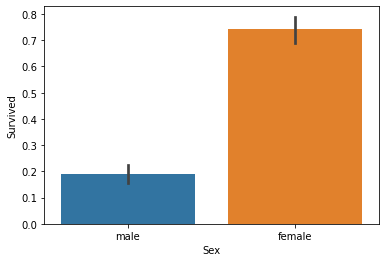

In [4]:
sns.barplot(df["Sex"],df["Survived"])

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df1=df.drop(["Name",],axis=1)

In [7]:
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [8]:
a=df1[df1["Survived"]==1].PassengerId
b=df1[df1["Survived"]==0].PassengerId

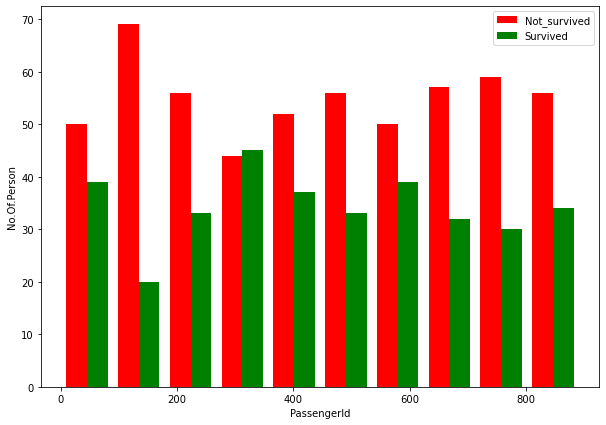

In [9]:
plt.figure(figsize=(10,7))
plt.hist([b,a],color=["red","green"],label=["Not_survived","Survived"])
plt.xlabel("PassengerId")
plt.ylabel("No.Of.Person")
plt.legend()

No Relationship with Survived Class

In [10]:
df1=df1.drop("PassengerId",axis=1)
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [11]:
df1["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [12]:
a=df1[df1["Survived"]==1].Pclass
b=df1[df1["Survived"]==0].Pclass

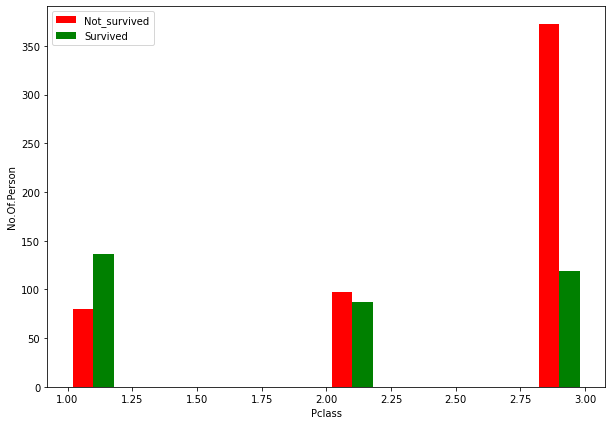

In [13]:
plt.figure(figsize=(10,7))
plt.hist([b,a],color=["red","green"],label=["Not_survived","Survived"])
plt.xlabel("Pclass")
plt.ylabel("No.Of.Person")
plt.legend()

So maximum No of people died from Pclass=3,
Pclass 1 have maximum Survival Chances

In [14]:
a=df1[df1["Survived"]==1].Sex
b=df1[df1["Survived"]==0].Sex

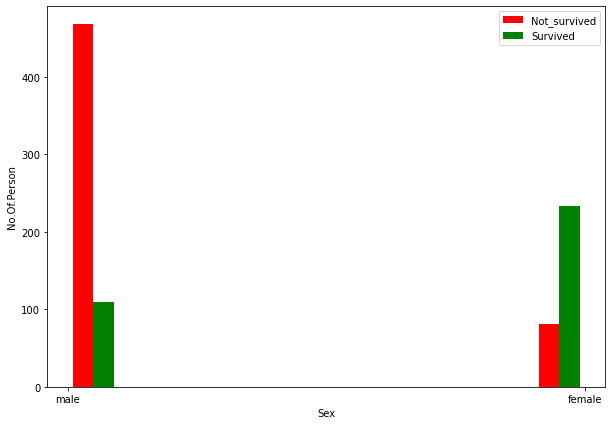

In [15]:
plt.figure(figsize=(10,7))
plt.hist([b,a],color=["red","green"],label=["Not_survived","Survived"])
plt.xlabel("Sex")
plt.ylabel("No.Of.Person")
plt.legend()

Maximum persons who have survived are Female

In [16]:
a=df1[df1["Survived"]==1].Age
b=df1[df1["Survived"]==0].Age

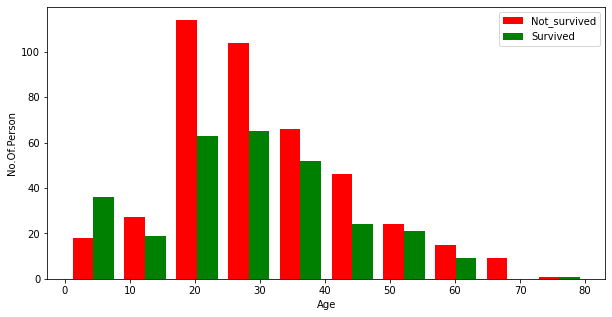

In [17]:
plt.figure(figsize=(10,5))
plt.hist([b,a],color=["red","green"],label=["Not_survived","Survived"],bins=10)
plt.xlabel("Age")
plt.ylabel("No.Of.Person")
plt.legend()

So People Having Age 50-60,70-80 have nearly 50 % chance of Surviving
People of Age 60-70 doesn't survive at all,
children of age 0-10 survived most

Divide Dataset as |0-10:higher survival rate|,|10-50 union 60-70 as lower survival rate|,|50-60: medium survival rate|

I can consider anyone above 70 age as an outlier

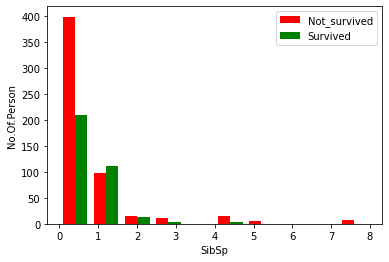

In [18]:
a=df1[df1["Survived"]==1].SibSp
b=df1[df1["Survived"]==0].SibSp
plt.hist([b,a],color=["red","green"],label=["Not_survived","Survived"])
plt.xlabel("SibSp")
plt.ylabel("No.Of.Person")
plt.legend()

Here i can consider anything above 5 As an outlier

In [19]:
len(df1["Ticket"].unique())

681

In [20]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [21]:
def clean_Ticket(ticket):
    ticket=re.sub(r"W./C","",ticket)
    ticket=re.sub(r"\D","",ticket)
    return ticket

In [22]:
df2=df1.copy()

In [23]:
df2["Ticket"]=df1["Ticket"].apply(clean_Ticket)

In [24]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,521171,7.2500,NaN,S
1,1,1,female,38.0,1,0,17599,71.2833,C85,C
2,1,3,female,26.0,0,0,23101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [25]:
len(df2["Ticket"].unique())

679

In [26]:
df2["Ticket"].value_counts()

1601      7
2343      7
347082    7
2144      6
347088    6
         ..
4136      1
14208     1
11813     1
31026     1
17463     1
Name: Ticket, Length: 679, dtype: int64

In [27]:
len(df1["Fare"].unique())

248

In [28]:
df1["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [29]:
max(df1["Fare"])

512.3292

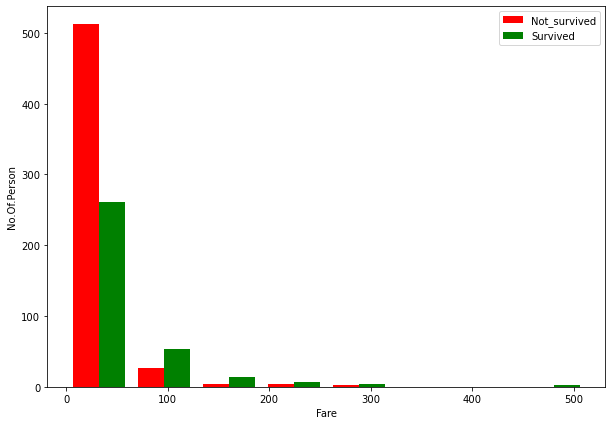

In [30]:
plt.figure(figsize=(10,7))
a=df1[df1["Survived"]==1].Fare
b=df1[df1["Survived"]==0].Fare
plt.hist([b,a],color=["red","green"],label=["Not_survived","Survived"],bins=8)
plt.xlabel("Fare")
plt.ylabel("No.Of.Person")
plt.legend()

So Having Fare more Than 300 i can Count as outlier,
People having Fare between 100 to 200 are having more chances of surviving than any other

In [31]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,521171,7.2500,NaN,S
1,1,1,female,38.0,1,0,17599,71.2833,C85,C
2,1,3,female,26.0,0,0,23101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [32]:
df1["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [33]:
df1["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
df3=df2.copy()
df3=df2.dropna()

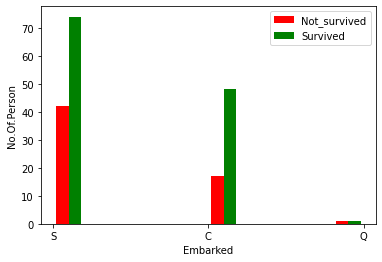

In [35]:

a=df3[df3["Survived"]==1].Embarked
b=df3[df3["Survived"]==0].Embarked
plt.hist([b,a],color=["red","green"],label=["Not_survived","Survived"])
plt.xlabel("Embarked")
plt.ylabel("No.Of.Person")
plt.legend()

MAximum Person Was of Class S

In [36]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [37]:
df1["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
C22 C26        3
              ..
A19            1
B86            1
C32            1
C106           1
D6             1
Name: Cabin, Length: 147, dtype: int64

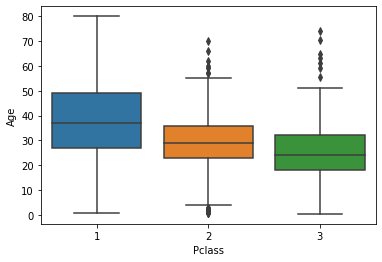

In [11]:
sns.boxplot(x="Pclass",y="Age",data=df)

So people of younger age are tend to be in Pclass3

# Cleaning the Data

In [38]:
#I can consider anyone above 70 age as an outlier--Age
#Here i can consider anything above 5 As an outlier--Sibsp
#So Having Fare more Than 300 i can Count as outlier
data=df2.drop("Cabin",axis=1)

In [39]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,521171,7.2500,S
1,1,1,female,38.0,1,0,17599,71.2833,C
2,1,3,female,26.0,0,0,23101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [40]:
len(data)

891

In [41]:
data1=data[data["Age"]<=70]

In [42]:
len(data1)

709

In [43]:
data2=data1[data1["SibSp"]<=5]
data2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,521171,7.2500,S
1,1,1,female,38.0,1,0,17599,71.2833,C
2,1,3,female,26.0,0,0,23101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,382652,29.1250,Q
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [44]:
len(data2)

709

In [45]:
data3=data2.copy()


In [46]:
len(data3)

709

In [47]:
data3.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [48]:
data3

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,521171,7.2500,S
1,1,1,female,38.0,1,0,17599,71.2833,C
2,1,3,female,26.0,0,0,23101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,382652,29.1250,Q
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
889,1,1,male,26.0,0,0,111369,30.0000,C


# Feature Engineering

In [49]:
Survival_Rate=[]
for i in data3["Age"]:
    if i<11:
        Survival_Rate.append("Max")
    elif i<50 and i>=11:
        Survival_Rate.append("Worst")
    elif i>=50 and i<=60:
        Survival_Rate.append("Medium")
    elif i>60:
        Survival_Rate.append("Worst")

In [50]:
sur=pd.DataFrame(Survival_Rate)

In [51]:
data3=pd.concat([data3,sur],axis=1)

In [52]:
data3

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,0
0,0.0,3.0,male,22.0,1.0,0.0,521171,7.2500,S,Worst
1,1.0,1.0,female,38.0,1.0,0.0,17599,71.2833,C,Worst
2,1.0,3.0,female,26.0,0.0,0.0,23101282,7.9250,S,Worst
3,1.0,1.0,female,35.0,1.0,0.0,113803,53.1000,S,Worst
4,0.0,3.0,male,35.0,0.0,0.0,373450,8.0500,S,Worst
...,...,...,...,...,...,...,...,...,...,...
885,0.0,3.0,female,39.0,0.0,5.0,382652,29.1250,Q,NaN
886,0.0,2.0,male,27.0,0.0,0.0,211536,13.0000,S,NaN
887,1.0,1.0,female,19.0,0.0,0.0,112053,30.0000,S,NaN
889,1.0,1.0,male,26.0,0.0,0.0,111369,30.0000,C,NaN


In [53]:
data3.isnull().sum()

Survived    149
Pclass      149
Sex         149
Age         149
SibSp       149
Parch       149
Ticket      149
Fare        149
Embarked    151
0           149
dtype: int64

In [54]:
data3[0].value_counts()

Worst     593
Max        64
Medium     52
Name: 0, dtype: int64

# Preprocessing of Data

In [55]:
data3.isnull().sum()

Survived    149
Pclass      149
Sex         149
Age         149
SibSp       149
Parch       149
Ticket      149
Fare        149
Embarked    151
0           149
dtype: int64

In [56]:
l=LabelEncoder()
data4=data3.copy()
data4=data4.dropna()

In [57]:
len(data4)

559

In [58]:
data4["Sex"]=l.fit_transform(data4["Sex"])
data4=pd.get_dummies(data4,columns=["Embarked","Pclass","SibSp"])

In [88]:
data4

,Survived,Sex,Age,Parch,Ticket,Fare,0,Embarked_C,Embarked_Q,Embarked_S,Pclass_1.0,Pclass_2.0,Pclass_3.0,SibSp_0.0,SibSp_1.0,SibSp_2.0,SibSp_3.0,SibSp_4.0,SibSp_5.0
0,0.0,1,0.306859,0.0,521171,0.014151,Worst,0,0,1,0,0,1,0,1,0,0,0,0
1,1.0,0,0.537906,0.0,17599,0.139136,Worst,1,0,0,1,0,0,0,1,0,0,0,0
2,1.0,0,0.364621,0.0,23101282,0.015469,Worst,0,0,1,0,0,1,1,0,0,0,0,0
3,1.0,0,0.494585,0.0,113803,0.103644,Worst,0,0,1,1,0,0,0,1,0,0,0,0
4,0.0,1,0.494585,0.0,373450,0.015713,Worst,0,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,0.0,1,0.364621,0.0,350025,0.015330,Worst,0,0,1,0,0,1,0,1,0,0,0,0
705,0.0,1,0.552347,0.0,250655,0.050749,Worst,0,0,1,0,1,0,1,0,0,0,0,0
706,1.0,0,0.638989,0.0,223596,0.026350,Worst,0,0,1,0,1,0,1,0,0,0,0,0
707,1.0,1,0.595668,0.0,17476,0.051310,Worst,0,0,1,1,0,0,1,0,0,0,0,0


In [89]:
S=MinMaxScaler()

In [90]:
data4[["Age","Fare"]]=S.fit_transform(data4[["Age","Fare"]])

In [91]:
data4.dtypes

Survived      float64
Sex             int32
Age           float64
Parch         float64
Ticket         object
Fare          float64
0              object
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
Pclass_1.0      uint8
Pclass_2.0      uint8
Pclass_3.0      uint8
SibSp_0.0       uint8
SibSp_1.0       uint8
SibSp_2.0       uint8
SibSp_3.0       uint8
SibSp_4.0       uint8
SibSp_5.0       uint8
dtype: object

In [92]:
data4

,Survived,Sex,Age,Parch,Ticket,Fare,0,Embarked_C,Embarked_Q,Embarked_S,Pclass_1.0,Pclass_2.0,Pclass_3.0,SibSp_0.0,SibSp_1.0,SibSp_2.0,SibSp_3.0,SibSp_4.0,SibSp_5.0
0,0.0,1,0.306859,0.0,521171,0.014151,Worst,0,0,1,0,0,1,0,1,0,0,0,0
1,1.0,0,0.537906,0.0,17599,0.139136,Worst,1,0,0,1,0,0,0,1,0,0,0,0
2,1.0,0,0.364621,0.0,23101282,0.015469,Worst,0,0,1,0,0,1,1,0,0,0,0,0
3,1.0,0,0.494585,0.0,113803,0.103644,Worst,0,0,1,1,0,0,0,1,0,0,0,0
4,0.0,1,0.494585,0.0,373450,0.015713,Worst,0,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,0.0,1,0.364621,0.0,350025,0.015330,Worst,0,0,1,0,0,1,0,1,0,0,0,0
705,0.0,1,0.552347,0.0,250655,0.050749,Worst,0,0,1,0,1,0,1,0,0,0,0,0
706,1.0,0,0.638989,0.0,223596,0.026350,Worst,0,0,1,0,1,0,1,0,0,0,0,0
707,1.0,1,0.595668,0.0,17476,0.051310,Worst,0,0,1,1,0,0,1,0,0,0,0,0


Avoiding Dummy Variable Trap

In [87]:
data5=data4.drop(["Ticket","Pclass_1.0","Embarked_C","SibSp_0.0"],axis=1)
data5

,Survived,Sex,Age,Parch,Fare,0,Embarked_Q,Embarked_S,Pclass_2.0,Pclass_3.0,SibSp_1.0,SibSp_2.0,SibSp_3.0,SibSp_4.0,SibSp_5.0
0,0.0,1,0.306859,0.0,0.014151,Worst,0,1,0,1,1,0,0,0,0
1,1.0,0,0.537906,0.0,0.139136,Worst,0,0,0,0,1,0,0,0,0
2,1.0,0,0.364621,0.0,0.015469,Worst,0,1,0,1,0,0,0,0,0
3,1.0,0,0.494585,0.0,0.103644,Worst,0,1,0,0,1,0,0,0,0
4,0.0,1,0.494585,0.0,0.015713,Worst,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,0.0,1,0.364621,0.0,0.015330,Worst,0,1,0,1,1,0,0,0,0
705,0.0,1,0.552347,0.0,0.050749,Worst,0,1,1,0,0,0,0,0,0
706,1.0,0,0.638989,0.0,0.026350,Worst,0,1,1,0,0,0,0,0,0
707,1.0,1,0.595668,0.0,0.051310,Worst,0,1,0,0,0,0,0,0,0


# Building The Model

In [ ]:
x=data5.drop("Survived",axis=1)
y=data5["Survived"]
data5.shape

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
x.shape

In [ ]:
cross_val_score(LogisticRegression(),x,y)

In [ ]:
cross_val_score(RandomForestClassifier(),x,y)

In [ ]:
cross_val_score(DecisionTreeClassifier(),x,y)

In [65]:
model=keras.Sequential([
    keras.layers.Dense(400,activation="relu"),
    keras.layers.Dense(250,activation="relu"),
    keras.layers.Dense(150,activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(80,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(30,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(18,activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(5,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])
model.fit(x_train,y_train,epochs=95)

NameError: name 'x_train' is not defined

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)
model1.score(x_test,y_test)

In [ ]:
model2=RandomForestClassifier(n_estimators=700,max_features=3,max_depth=5,min_samples_leaf=3)
model2.fit(x,y)
model2.score(x_test,y_test)

In [ ]:
y_pred=model2.predict(x_test)
p=[]
for i in y_pred:
    if i>0.5:
        p.append(1)
    if i<0.5:
        p.append(0)

In [ ]:
print(len(y_pred),len(p))

In [ ]:
print(classification_report(p,y_test))

In [66]:
model=keras.Sequential([
    keras.layers.Dense(400,activation="relu"),
    keras.layers.Dense(250,activation="relu"),
    keras.layers.Dense(150,activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(80,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(30,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(18,activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(5,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])
model.fit(x,y,epochs=100)

NameError: name 'x' is not defined

In [67]:
model4=LogisticRegression()
model4.fit(x_train,y_train)
model4.score(x_test,y_test)

NameError: name 'x_train' is not defined

# Testing

In [68]:
test=pd.read_csv(r"C:\Mba notes\novels\project data\titanic_test.csv")

In [69]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [70]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [71]:
test1=test.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [72]:
test1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [73]:
test1["SibSp"].value_counts()

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

In [74]:
test2=pd.get_dummies(test1,columns=["Pclass","SibSp","Embarked"])

In [75]:
test2

,Sex,Age,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_C,Embarked_Q,Embarked_S
0,male,34.5,0,7.8292,0,0,1,1,0,0,0,0,0,0,0,1,0
1,female,47.0,0,7.0000,0,0,1,0,1,0,0,0,0,0,0,0,1
2,male,62.0,0,9.6875,0,1,0,1,0,0,0,0,0,0,0,1,0
3,male,27.0,0,8.6625,0,0,1,1,0,0,0,0,0,0,0,0,1
4,female,22.0,1,12.2875,0,0,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,male,NaN,0,8.0500,0,0,1,1,0,0,0,0,0,0,0,0,1
414,female,39.0,0,108.9000,1,0,0,1,0,0,0,0,0,0,1,0,0
415,male,38.5,0,7.2500,0,0,1,1,0,0,0,0,0,0,0,0,1
416,male,NaN,0,8.0500,0,0,1,1,0,0,0,0,0,0,0,0,1


In [76]:
test2.isnull().sum()

Sex            0
Age           86
Parch          0
Fare           1
Pclass_1       0
Pclass_2       0
Pclass_3       0
SibSp_0        0
SibSp_1        0
SibSp_2        0
SibSp_3        0
SibSp_4        0
SibSp_5        0
SibSp_8        0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [77]:
test2.describe()


,Age,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_C,Embarked_Q,Embarked_S
count,332.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,30.272590,0.392344,35.627188,0.255981,0.222488,0.521531,0.677033,0.263158,0.033493,0.009569,0.009569,0.002392,0.004785,0.244019,0.110048,0.645933
std,14.181209,0.981429,55.907576,0.436934,0.416416,0.500135,0.468170,0.440875,0.180135,0.097471,0.097471,0.048912,0.069088,0.430019,0.313324,0.478803
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,14.454200,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,39.000000,0.000000,31.500000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,76.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
test3=test2.copy()
test3=test3.drop(["Pclass_1","SibSp_0","SibSp_8","Embarked_C"],axis=1)

In [79]:
test3["Sex"]=l.fit_transform(test3["Sex"])

In [80]:
test3["Fare"]=test3["Fare"].fillna(35.62)
test3.isnull().sum()

Sex            0
Age           86
Parch          0
Fare           0
Pclass_2       0
Pclass_3       0
SibSp_1        0
SibSp_2        0
SibSp_3        0
SibSp_4        0
SibSp_5        0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [81]:
test3.describe()

,Sex,Age,Parch,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Embarked_Q,Embarked_S
count,418.000000,332.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.636364,30.272590,0.392344,35.627171,0.222488,0.521531,0.263158,0.033493,0.009569,0.009569,0.002392,0.110048,0.645933
std,0.481622,14.181209,0.981429,55.840500,0.416416,0.500135,0.440875,0.180135,0.097471,0.097471,0.048912,0.313324,0.478803
min,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,27.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,39.000000,0.000000,31.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,76.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
test3=test3.fillna(30.27)

In [ ]:
model=RandomForestClassifier()

In [388]:
clf=RandomizedSearchCV(RandomForestClassifier(),{
    "n_estimators":range(600,700),
    "max_features":range(1,5),
    "max_depth":range(3,8),
    "min_samples_leaf":range(1,10)
},cv=5,return_train_score=False)
clf.fit(x,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(3, 8),
                                        'max_features': range(1, 5),
                                        'min_samples_leaf': range(1, 10),
                                        'n_estimators': range(600, 700)})

In [389]:
clf.best_params_

{'n_estimators': 621, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': 6}

In [395]:
model3=RandomForestClassifier(n_estimators=621,max_features=3,max_depth=6,min_samples_leaf=1)
model3.fit(x_train,y_train),model3.score(x_test,y_test)

(RandomForestClassifier(max_depth=6, max_features=3, n_estimators=621),
 0.8169014084507042)

In [396]:
model3.fit(x,y)
pred=model2.predict(test3)
p=[]
for i in pred:
    if i>0.5:
        p.append(1)
    elif i<0.5:
        p.append(0)

In [117]:
model2.fit(x,y)
pred=model2.predict(test3)
p=[]
for i in pred:
    if i>0.5:
        p.append(1)
    elif i<0.5:
        p.append(0)
      

In [118]:
pred=pd.DataFrame(p)
a=test["PassengerId"]

In [119]:
subm=pd.concat([a,pred],axis=1)

In [120]:
subm[0].value_counts()

0    266
1    152
Name: 0, dtype: int64

In [121]:
submission=pd.DataFrame(subm).to_csv(r"C:\Mba notes\novels\project_predictions\submission.csv")